In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
churn_data=pd.read_csv("/content/drive/MyDrive/datasets/bank_churn_dataset.csv")

In [ ]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn_data.shape

(10000, 14)

In [ ]:
#churn_data.dtypes

In [ ]:
churn_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
churn_data.shape

(10000, 14)

In [ ]:
type(churn_data["TotalCharges"]), type(churn_data.TotalCharges)

(pandas.core.series.Series, pandas.core.series.Series)

In [ ]:
churn_data1.TotalCharges=pd.to_numeric(churn_data1.TotalCharges)

<ipython-input-14-c7959c594abc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data1.TotalCharges=pd.to_numeric(churn_data1.TotalCharges)


In [ ]:
churn_data1[churn_data1["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
churn_data1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [ ]:
churn_data1.Churn.values

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype=object)

In [ ]:
churn_data1[churn_data1.Churn=="Yes"].shape

(1869, 20)

In [ ]:
churn_data1[churn_data1.Churn=="No"].shape

(5163, 20)

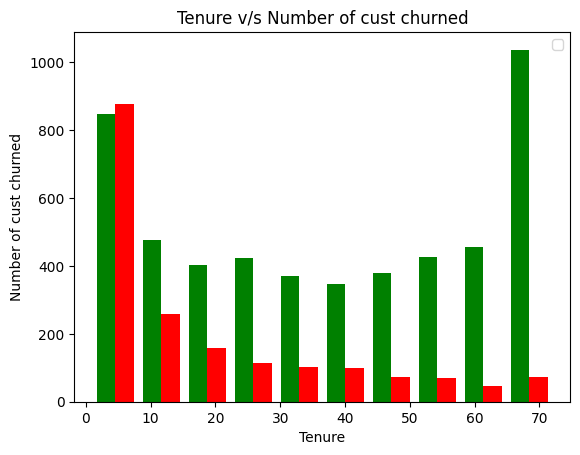

In [ ]:
tenure_churn_no=churn_data1[churn_data1.Churn=="No"].tenure
tenure_churn_yes=churn_data1[churn_data1.Churn=="Yes"].tenure

plt.xlabel("Tenure")
plt.ylabel("Number of cust churned")
plt.title("Tenure v/s Number of cust churned")

plt.hist([tenure_churn_no, tenure_churn_yes],color=["green","red"])
plt.legend()

In [ ]:
churn_data1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
def col_unique_value(d):
  for col in d:
    print(col,":", d[col].unique())


In [ ]:
#col_unique_value(churn_data1)

In [ ]:
churn_data1.replace("No phone service","No", inplace=True)
churn_data1.replace("No internet service","No", inplace=True)

<ipython-input-24-524bc47e5110>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data1.replace("No phone service","No", inplace=True)
<ipython-input-24-524bc47e5110>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data1.replace("No internet service","No", inplace=True)


In [ ]:
col_unique_value(churn_data1)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [ ]:
yes_no_col=["SeniorCitizen","Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "Churn"]

for i in yes_no_col:
  churn_data1[i].replace({"Yes":1,"No":0}, inplace=True)

<ipython-input-26-bbc9d99dc1d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data1[i].replace({"Yes":1,"No":0}, inplace=True)


In [ ]:
#col_unique_value(churn_data1)

In [ ]:
churn_data1["gender"].replace({"Female":1,"Male":0}, inplace=True)

<ipython-input-28-1edf0b6c5146>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data1["gender"].replace({"Female":1,"Male":0}, inplace=True)


In [ ]:
col_unique_value(churn_data1)

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [ ]:
churn_data_pro=pd.get_dummies(data=churn_data1, columns=["InternetService", "Contract", "PaymentMethod" ])

In [ ]:
col_unique_value(churn_data_pro)

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
InternetService_No : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
PaymentMethod_Bank transfer (automatic) : [0 1]
PaymentMethod_Credit card (automatic) : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed check : [0 1]


In [ ]:
#churn_data_pro

In [ ]:
col_to_scale=["tenure", "MonthlyCharges", "TotalCharges"]
scaler=MinMaxScaler()
churn_data_pro[col_to_scale]=scaler.fit_transform(churn_data_pro[col_to_scale])

In [ ]:
X=churn_data_pro.drop("Churn", axis="columns")
y=churn_data_pro["Churn"]

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 26), (1407, 26), (5625,), (1407,))

In [ ]:
model=keras.Sequential([keras.layers.Dense(1, input_shape=(26,), activation="relu")])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Accuracy"])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 2ms/step - loss: 4.1067 - Accuracy: 0.5280
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 2.8014 - Accuracy: 0.6204
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 2.2580 - Accuracy: 0.6448
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 2.0633 - Accuracy: 0.6775
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 1.8377 - Accuracy: 0.6757
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 1.7020 - Accuracy: 0.6884
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 1.5060 - Accuracy: 0.6855
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 1.4240 - Accuracy: 0.6965
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 1.2948 - Accuracy: 0.7058
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 1.1452 - Accura

In [ ]:
model=keras.Sequential([keras.layers.Dense(1, input_shape=(26,), activation="relu")])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Accuracy"])

model.fit(X_train, y_train, epochs=100, batch_size=500)

Epoch 1/100
563/563 [==============================] - 3s 3ms/step - loss: 4.0740 - Accuracy: 0.7340
Epoch 2/100
563/563 [==============================] - 2s 3ms/step - loss: 4.0724 - Accuracy: 0.7342
Epoch 3/100
563/563 [==============================] - 2s 3ms/step - loss: 4.0693 - Accuracy: 0.7342
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 4.0687 - Accuracy: 0.7342
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 3.9998 - Accuracy: 0.7339
Epoch 6/100
563/563 [==============================] - 1s 2ms/step - loss: 3.0606 - Accuracy: 0.7127
Epoch 7/100
563/563 [==============================] - 1s 2ms/step - loss: 1.4702 - Accuracy: 0.7399
Epoch 8/100
563/563 [==============================] - 1s 2ms/step - loss: 1.2194 - Accuracy: 0.7452
Epoch 9/100
563/563 [==============================] - 1s 2ms/step - loss: 1.0864 - Accuracy: 0.7488
Epoch 10/100
563/563 [==============================] - 1s 2ms/step - loss: 1.0159 - Accura

In [ ]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.8624 - Accuracy: 0.7768


[0.8623557686805725, 0.7768301367759705]

In [ ]:
y_test_pre=model.predict(X_test)
y_test_pre.shape

44/44 [==============================] - 0s 2ms/step


(1407, 1)

In [ ]:
y_test=np.array(y_test)

In [ ]:
y_test[6]

0

In [ ]:
y_test_pre[66]

array([0.60541487], dtype=float32)

In [ ]:
y_predicted=[]
for i in y_test_pre:
  if i<0.5:
    y_predicted.append(0)
  else:
    y_predicted.append(1)

y_predicted[77]

0

In [ ]:
cm=confusion_matrix(y_test, y_predicted)
cm

array([[877, 156],
       [158, 216]])

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1033
           1       0.58      0.58      0.58       374

    accuracy                           0.78      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.78      0.78      0.78      1407



In [ ]:
con_mat=tf.math.confusion_matrix(y_test, y_predicted)

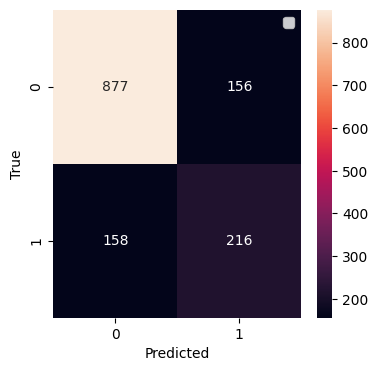

In [ ]:

plt.figure(figsize=(4,4))
sns.heatmap(con_mat, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.legend()

In [ ]:
model_gl=keras.Sequential([keras.layers.Dense(1, input_shape=(26,), activation="relu",
                                           kernel_initializer=keras.initializers.GlorotNormal())])

model_gl.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Accuracy"])

model_gl.fit(X_train, y_train, epochs=100, batch_size=500)

Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: 1.1448 - Accuracy: 0.7271
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 1.1199 - Accuracy: 0.7383
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0915 - Accuracy: 0.7440
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0780 - Accuracy: 0.7445
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0553 - Accuracy: 0.7449
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0292 - Accuracy: 0.7444
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0044 - Accuracy: 0.7451
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 0.9664 - Accuracy: 0.7454
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 0.9419 - Accuracy: 0.7452
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 0.9221 - Accuracy: 0.7451
Epoch 11/

In [ ]:
model_gl.evaluate(X_test, y_test)

44/44 [==============================] - 0s 5ms/step - loss: 0.6610 - Accuracy: 0.7584


[0.6609867811203003, 0.7583510875701904]

In [ ]:
model=keras.Sequential([keras.layers.Dense(100, input_shape=(26,), activation="relu"),
                        keras.layers.Dense(1,activation="sigmoid"),
                        ])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Accuracy"])

model.fit(X_train, y_train, epochs=5000)


Streaming output truncated to the last 5000 lines.
176/176 [==============================] - 1s 3ms/step - loss: 0.1072 - Accuracy: 0.9504
Epoch 2502/5000
176/176 [==============================] - 1s 3ms/step - loss: 0.1090 - Accuracy: 0.9516
Epoch 2503/5000
176/176 [==============================] - 1s 3ms/step - loss: 0.1096 - Accuracy: 0.9497
Epoch 2504/5000
176/176 [==============================] - 1s 3ms/step - loss: 0.1081 - Accuracy: 0.9524
Epoch 2505/5000
176/176 [==============================] - 1s 3ms/step - loss: 0.1068 - Accuracy: 0.9532
Epoch 2506/5000
176/176 [==============================] - 1s 3ms/step - loss: 0.1077 - Accuracy: 0.9531
Epoch 2507/5000
176/176 [==============================] - 1s 3ms/step - loss: 0.1066 - Accuracy: 0.9516
Epoch 2508/5000
176/176 [==============================] - 1s 3ms/step - loss: 0.1062 - Accuracy: 0.9522
Epoch 2509/5000
176/176 [==============================] - 1s 4ms/step - loss: 0.1094 - Accuracy: 0.9520
Epoch 2510/5000
176/

In [ ]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 4ms/step - loss: 2.4922 - Accuracy: 0.7235


[2.492220163345337, 0.7235252261161804]

In [ ]:
model_d=keras.Sequential([keras.layers.Dense(100, input_shape=(26,), activation="relu"),
                        keras.layers.Dropout(0.2),
                        keras.layers.Dense(1,activation="sigmoid"),
                        ])

model_d.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Accuracy"])

model_d.fit(X_train, y_train, epochs=100)


Epoch 1/100
176/176 [==============================] - 5s 5ms/step - loss: 0.4723 - Accuracy: 0.7643
Epoch 2/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4241 - Accuracy: 0.7952
Epoch 3/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4199 - Accuracy: 0.7947
Epoch 4/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4179 - Accuracy: 0.8011
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4138 - Accuracy: 0.8048
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4130 - Accuracy: 0.8062
Epoch 7/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4105 - Accuracy: 0.8100
Epoch 8/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4075 - Accuracy: 0.8100
Epoch 9/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4080 - Accuracy: 0.8066
Epoch 10/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4072 - Accura

In [ ]:
model_d.evaluate(X_test,y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4613 - Accuracy: 0.7790


[0.46130532026290894, 0.7789623141288757]

In [ ]:
model_nor=keras.Sequential([keras.layers.Dense(100, input_shape=(26,)),
                            keras.layers.BatchNormalization(),
                            keras.layers.Activation("relu"),
                            keras.layers.Dropout(0.2),
                            keras.layers.Dense(1,activation="sigmoid"),
                        ])

model_nor.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Accuracy"])

model_nor.fit(X_train, y_train, epochs=100)


Epoch 1/100
176/176 [==============================] - 3s 4ms/step - loss: 0.4664 - Accuracy: 0.7712
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4368 - Accuracy: 0.7863
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4282 - Accuracy: 0.7968
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4222 - Accuracy: 0.7989
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4225 - Accuracy: 0.7989
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4209 - Accuracy: 0.8034
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4128 - Accuracy: 0.8044
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4152 - Accuracy: 0.8034
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4108 - Accuracy: 0.8108
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4098 - Accura

In [ ]:
model_nor.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4552 - Accuracy: 0.7846


[0.4552422761917114, 0.7846481800079346]

In [ ]:
model_nor=keras.Sequential([keras.layers.Dense(100, input_shape=(26,)),
                            keras.layers.BatchNormalization(),
                            keras.layers.Activation("relu"),
                            keras.layers.Dropout(0.2),

                            keras.layers.Dense(100),
                            keras.layers.BatchNormalization(),
                            keras.layers.Activation("relu"),
                            keras.layers.Dropout(0.2),


                            keras.layers.Dense(1,activation="sigmoid"),
                        ])

model_nor.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Accuracy"])

model_nor.fit(X_train, y_train, epochs=100)


Epoch 1/100
176/176 [==============================] - 4s 5ms/step - loss: 0.4827 - Accuracy: 0.7643
Epoch 2/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4421 - Accuracy: 0.7868
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4287 - Accuracy: 0.7934
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4238 - Accuracy: 0.7938
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4227 - Accuracy: 0.7957
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4166 - Accuracy: 0.8043
Epoch 7/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4138 - Accuracy: 0.8043
Epoch 8/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4128 - Accuracy: 0.7988
Epoch 9/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4128 - Accuracy: 0.8055
Epoch 10/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4078 - Accura

In [ ]:
model_nor=keras.Sequential([keras.layers.Dense(100, input_shape=(26,)),
                            keras.layers.BatchNormalization(),
                            keras.layers.Activation("relu"),
                            keras.layers.Dropout(0.2),

                            keras.layers.Dense(100),
                            keras.layers.BatchNormalization(),
                            keras.layers.Activation("relu"),
                            keras.layers.Dropout(0.2),


                            keras.layers.Dense(1,activation="sigmoid"),
                        ])

model_nor.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01, ), loss="binary_crossentropy", metrics=["Accuracy"])

model_nor.fit(X_train, y_train, epochs=100)


Epoch 1/100
176/176 [==============================] - 4s 6ms/step - loss: 0.4664 - Accuracy: 0.7792
Epoch 2/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4357 - Accuracy: 0.7916
Epoch 3/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4283 - Accuracy: 0.8009
Epoch 4/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4281 - Accuracy: 0.7963
Epoch 5/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4229 - Accuracy: 0.8002
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4172 - Accuracy: 0.8007
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4224 - Accuracy: 0.7940
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4149 - Accuracy: 0.8053
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4193 - Accuracy: 0.8032
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4103 - Accura